start: 2020/04/29 01:57:17


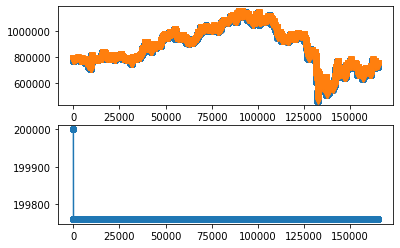

end: 2020/04/29 01:57:30


In [3]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from mylib import bitcoin
from mylib import simulator

def plot(x, y, y_pred, y_asset):
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    ax1.plot(list(range(len(x))), y, marker="o")
    ax1.plot(list(range(len(x))), y_pred, marker="v")
    ax2.plot(list(range(len(x))), y_asset, marker="o")
    plt.show()

def main():
    print('start: ' + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))
    
    csv = pd.read_csv("datasets/train_v2.csv")
    b = bitcoin.BitcoinRegression()
    b.set_dataset(csv)
    b.load_model('models/model_v2.pickle')
    b.set_train_test_dataset(0.9, 0.1)
    s = simulator.BitcoinSimulator(200000)

    x = b.data_test
    y = b.label_test
    y_pred = b.model.predict(x)
    y_asset = s.simulate(b.data_test, b.model)
    plot(x, y, y_pred, y_asset)
    
    print('end: ' + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()